# ML Project 1: IODP382 Marine Sediment Data Exploration

In this project I will explore the use of Unsupervised Machine Learning to identify patterns in marine sediment data by combining geochemical and sedimentological data.  The purpose of this excersize is to see how robustly I can use unsupervised machine learning to identify patterns in the variety of variables accessible from the IODP LIMS database which commonly stores the physical and chemical datasets collected from each expedition.  

Here, I explore the XRF and Magnetic Susceptibility Data from hole u1538 as a test of how reliaby this data can be explored.  The MS data is pretty continuous, but the XRF data seems to only have been applied to specific areas of interest in the core.  

In [2]:
# Import IODP 382 folder
from google.colab import files
import zipfile
import os

# Step 1: Upload the .zip file
print("Upload your zipped folder:")
uploaded = files.upload()

# Step 2: Extract the uploaded .zip file
for filename in uploaded.keys():
    if filename.endswith(".zip"):
        IODP382 = filename.replace(".zip", "")
        with zipfile.ZipFile(filename, 'r') as zip_ref:
            zip_ref.extractall(IODP382)  # Extract to a folder
        print(f"Folder '{IODP382}' extracted successfully!")

# Step 3: Verify the contents of the extracted folder
print(f"Contents of the extracted folder '{IODP382}':")
print(os.listdir(IODP382))


Upload your zipped folder:


Saving IODP382.zip to IODP382.zip
Folder 'IODP382' extracted successfully!
Contents of the extracted folder 'IODP382':
['IODP382']


In [3]:
import os
import pandas as pd

# Define the unzipped folder and the Excel file names
unzipped_folder = "IODP382"  # This is the unzipped folder name
ms_excel = "IODP382_u1538_MS.xlsx"  # Name of the MS Excel file
xrf_excel = "382_U1538A_XRF.xlsx"  # Name of the XRF Excel file

# Construct the full file paths
ms_file_path = os.path.join(unzipped_folder, ms_excel)
xrf_file_path = os.path.join(unzipped_folder, xrf_excel)

# Check if the files exist and load them
if os.path.exists(ms_file_path):
    ms_data = pd.read_excel(ms_file_path)
    print(f"File '{ms_excel}' successfully loaded!")
    print(ms_data.head())  # Display the first few rows of the MS data
else:
    print(f"File '{ms_excel}' not found in folder '{unzipped_folder}'.")

if os.path.exists(xrf_file_path):
    xrf_data = pd.read_excel(xrf_file_path)
    print(f"File '{xrf_excel}' successfully loaded!")
    print(xrf_data.head())  # Display the first few rows of the XRF data
else:
    print(f"File '{xrf_excel}' not found in folder '{unzipped_folder}'.")


File 'IODP382_u1538_MS.xlsx' not found in folder 'IODP382'.
File '382_U1538A_XRF.xlsx' not found in folder 'IODP382'.


In [4]:

import os

unzipped_folder = "IODP382"
print("Files in the 'IODP382' folder:")
print(os.listdir(unzipped_folder))


Files in the 'IODP382' folder:
['IODP382']


Just making sure all the files I need are here:)

In [5]:
import os

unzipped_folder = "IODP382/IODP382"  # Nested folder
print("Files in the 'IODP382/IODP382' folder:")
print(os.listdir(unzipped_folder))


Files in the 'IODP382/IODP382' folder:
['IODP382_u1534_MS.csv', '382_U1538A_XRF.csv', 'IODP382_u1537_MS.csv', '382_U1538C_XRF.csv', 'IODP382_u1535_MS.csv', 'IODP382_u1538_MS.csv', 'IODP382_u1536_MS.csv', '382_U1538D_XRF.csv']


In [7]:
import pandas as pd

# Define the file paths
ms_file = 'IODP382/IODP382/IODP382_u1538_MS.csv'
xrf_file = 'IODP382/IODP382/382_U1538A_XRF.csv'

# Load the data into pandas DataFrames
ms_data = pd.read_csv(ms_file)
xrf_data = pd.read_csv(xrf_file)

# Display the first few rows of each DataFrame to verify
print("MS Data:")
print(ms_data.head())

print("\nXRF Data:")
print(xrf_data.head())


MS Data:
   Exp   Site Hole  Core Type  Sect  A/W  Offset (cm)  Depth CSF-A (m)  \
0  382  U1538    A     1    H     1  NaN          2.0             0.02   
1  382  U1538    A     1    H     1  NaN          3.0             0.03   
2  382  U1538    A     1    H     1  NaN          4.0             0.04   
3  382  U1538    A     1    H     1  NaN          5.0             0.05   
4  382  U1538    A     1    H     1  NaN          6.0             0.06   

   Depth CSF-B (m)  Magnetic susceptibility (instr. units)  \
0            0.020                                    6.00   
1            0.030                                    7.00   
2            0.040                                    7.67   
3            0.049                                    7.67   
4            0.059                                    7.33   

       Timestamp (UTC) Instrument Instrument group      Text ID   Test No.  \
0  2019-05-05 06:42:42   MS2C-695            WRMSL  SECT9960051  114346161   
1  2019-05-05 06:

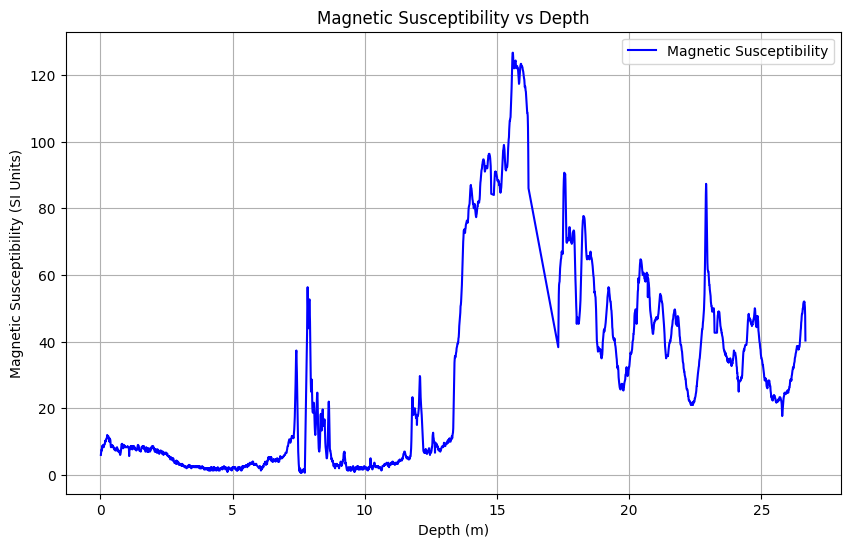

In [8]:
import matplotlib.pyplot as plt


plt.figure(figsize=(10, 6))
plt.plot(ms_data['Depth CSF-A (m)'], ms_data['Magnetic susceptibility (instr. units)'], label='Magnetic Susceptibility', color='blue')

plt.title('Magnetic Susceptibility vs Depth')
plt.xlabel('Depth (m)')  # Adjust if depth is in another unit
plt.ylabel('Magnetic Susceptibility (SI Units)')  # Adjust if necessary
plt.legend()
plt.grid(True)
plt.show()


#**XRF Data Cleanup**


I first had to do a bit of cleanup, seen below.  Because the XRF data set has a alot of different columns, I had to first isolate only the columns that I wanted, that displayed the areas of each element the XRF measured. To use XRF area data, I had to normalize each element to the total count for each interval, because some intervals are measured at slightly higher resolutions than others.

In [9]:
print(xrf_data.columns)

Index(['Expedition', 'Site', 'Hole', 'Core', 'Type', 'Section', 'A/W',
       'Offset (mm)', 'CSF-A (m)', 'CSF-B (m)', 'Test No.', 'TextID',
       'Voltage (kV)', 'Tube Current (mA)', 'Live Time (s)', 'Real Time (s)',
       'Down-Core Slit (mm)', 'Cross-Core Slit (mm)', 'Filter',
       'Total Counts Per Second', 'Mg-Ka Area', 'Al-Ka Area', 'Si-Ka Area',
       'P -Ka Area', 'S -Ka Area', 'Cl-Ka Area', 'Ar-Ka Area', 'K -Ka Area',
       'Ca-Ka Area', 'Ti-Ka Area', 'Cr-Ka Area', 'Mn-Ka Area', 'Fe-Ka Area',
       'Rh-La-Coh Area', 'Instrument', 'Scan Number', 'Date of Measure',
       'Time of Measure', 'Uploaded By', 'Date Uploaded', 'Comment'],
      dtype='object')


In [10]:
required_columns = ['CSF-A (m)', 'Mg-Ka Area', 'Al-Ka Area', 'Si-Ka Area',
       'P -Ka Area', 'S -Ka Area', 'Cl-Ka Area', 'Ar-Ka Area', 'K -Ka Area',
       'Ca-Ka Area', 'Ti-Ka Area', 'Cr-Ka Area', 'Mn-Ka Area', 'Fe-Ka Area',
       'Rh-La-Coh Area']

xrf_filtered = xrf_data[required_columns]

print(xrf_filtered.head())

   CSF-A (m)  Mg-Ka Area  Al-Ka Area  Si-Ka Area  P -Ka Area  S -Ka Area  \
0      31.34         -45        2284       69051         137        1931   
1      31.38         -19        2313       74032          87        2137   
2      31.42         -47        2104       67312          79        1800   
3      31.46         -17        2733       76442         171        1787   
4      31.50          21        3196       84828         249        1706   

   Cl-Ka Area  Ar-Ka Area  K -Ka Area  Ca-Ka Area  Ti-Ka Area  Cr-Ka Area  \
0       72905       -2692       20987       21443       10870         -81   
1       74655       -3436       20982       21852       10884        -318   
2       73160       -3124       20333       21171       10863         101   
3       73257       -3527       22645       24800       12234         -80   
4       66380       -3544       24649       25942       12885          34   

   Mn-Ka Area  Fe-Ka Area  Rh-La-Coh Area  
0        1735      120755           

In [11]:
# Define your own column names
new_column_names = ['Depth', 'Mg', 'Al', 'Si', 'P', 'S', 'Cl', 'Ar', 'K', 'Ca', 'Ti', 'Cr', 'Mn', 'Fe', 'Rh']

# Assign the new column names to the dataframe
xrf_filtered.columns = new_column_names

# Print the updated column names
print(xrf_filtered.head())


   Depth  Mg    Al     Si    P     S     Cl    Ar      K     Ca     Ti   Cr  \
0  31.34 -45  2284  69051  137  1931  72905 -2692  20987  21443  10870  -81   
1  31.38 -19  2313  74032   87  2137  74655 -3436  20982  21852  10884 -318   
2  31.42 -47  2104  67312   79  1800  73160 -3124  20333  21171  10863  101   
3  31.46 -17  2733  76442  171  1787  73257 -3527  22645  24800  12234  -80   
4  31.50  21  3196  84828  249  1706  66380 -3544  24649  25942  12885   34   

     Mn      Fe     Rh  
0  1735  120755  42471  
1  1790  119267  44165  
2  1747  117487  43300  
3  1972  129151  44276  
4  1616  135946  42674  


In [12]:
# Separate the depth column (assuming it's the first column)
depth_column = xrf_filtered['Depth']

# Select only the columns you want to normalize (excluding 'depth')
columns_to_normalize = ['Mg', 'Al', 'Si', 'P', 'S', 'Cl', 'Ar', 'K', 'Ca', 'Ti', 'Cr', 'Mn', 'Fe', 'Rh']

# Normalize these selected columns
xrf_filtered_normalized = xrf_filtered[columns_to_normalize].div(xrf_filtered[columns_to_normalize].sum(axis=1), axis=0)

# Add the depth column back to the normalized dataframe
xrf_filtered_normalized['depth'] = depth_column

# Print the first few rows of the normalized data
print(xrf_filtered_normalized.head())


         Mg        Al        Si         P         S        Cl        Ar  \
0 -0.000124  0.006314  0.190880  0.000379  0.005338  0.201534 -0.007442   
1 -0.000052  0.006279  0.200960  0.000236  0.005801  0.202652 -0.009327   
2 -0.000132  0.005905  0.188927  0.000222  0.005052  0.205341 -0.008768   
3 -0.000044  0.007083  0.198116  0.000443  0.004631  0.189862 -0.009141   
4  0.000053  0.008059  0.213898  0.000628  0.004302  0.167380 -0.008936   

          K        Ca        Ti        Cr        Mn        Fe        Rh  depth  
0  0.058015  0.059276  0.030048 -0.000224  0.004796  0.333807  0.117404  31.34  
1  0.056956  0.059317  0.029545 -0.000863  0.004859  0.323751  0.119886  31.38  
2  0.057069  0.059421  0.030490  0.000283  0.004903  0.329755  0.121532  31.42  
3  0.058690  0.064275  0.031707 -0.000207  0.005111  0.334723  0.114751  31.46  
4  0.062154  0.065414  0.032490  0.000086  0.004075  0.342794  0.107604  31.50  


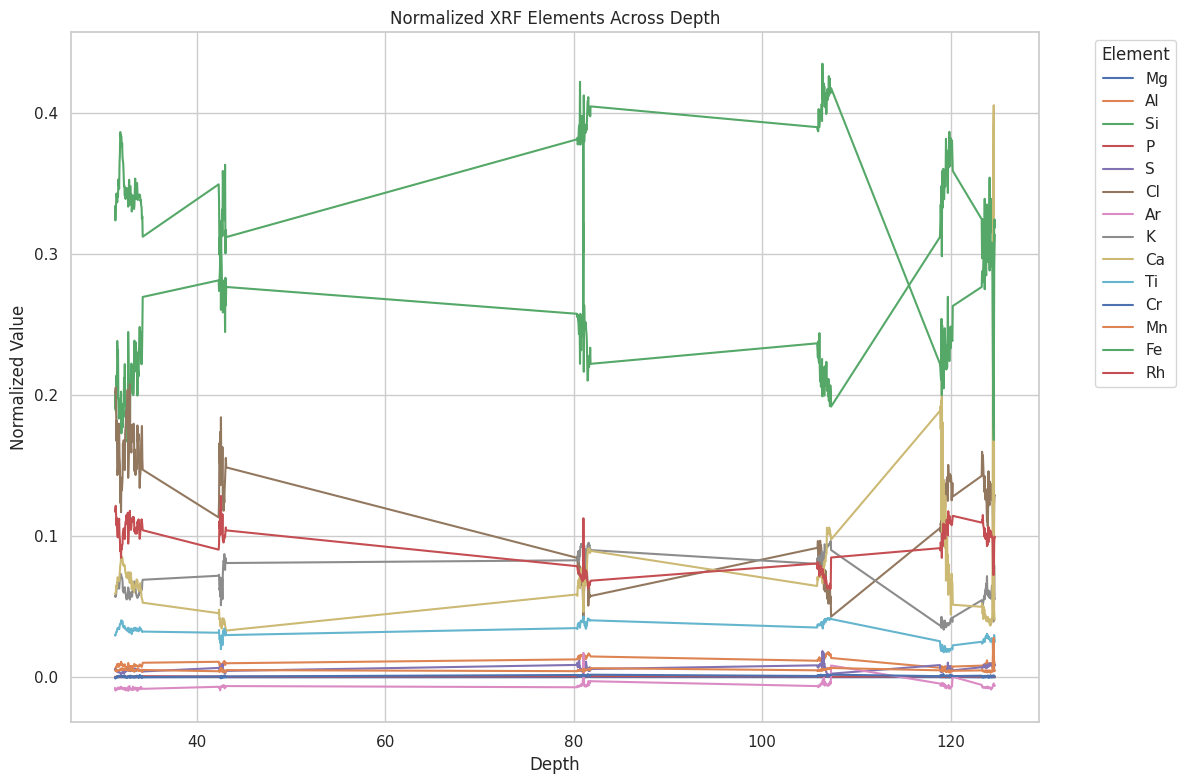

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style for seaborn plots
sns.set(style="whitegrid")

# Set up the plotting area
plt.figure(figsize=(12, 8))

# Plot each element against depth
for element in ['Mg', 'Al', 'Si', 'P', 'S', 'Cl', 'Ar', 'K', 'Ca', 'Ti', 'Cr', 'Mn', 'Fe', 'Rh']:
    sns.lineplot(data=xrf_filtered_normalized, x='depth', y=element, label=element)

# Customize the plot
plt.title('Normalized XRF Elements Across Depth')
plt.xlabel('Depth')
plt.ylabel('Normalized Value')
plt.legend(title='Element', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Show the plot
plt.show()


As we can see, not all areas have bee ncompletely measured via XRF.  This is because the core is quite long and it would be very expensive to measure the entire thing.  Therefore, only selected areas have been measured.  This makes me think that I should switch my thinking and use unsupervised learning to examine patterns just in these areas of interest.

The elements of most interest to me are the relationship between Ca/Fe, and Fe, Ti, because each can provide insight to the inputs of terrigenous vs biogenic material being deposited and can provide insight to glacial vs interglacial cycles.  Si is also of interest, because this records ocean productivity change through time.

In [14]:
# Calculate Ca/Fe ratio
xrf_filtered_normalized['Ca/Fe'] = xrf_filtered_normalized['Ca'] / xrf_filtered_normalized['Fe']

# Calculate Fe/Ti ratio
xrf_filtered_normalized['Fe/Ti'] = xrf_filtered_normalized['Fe'] / xrf_filtered_normalized['Ti']

# Print the first few rows to check the results
print(xrf_filtered_normalized[['depth', 'Ca/Fe', 'Fe/Ti']].head())


   depth     Ca/Fe      Fe/Ti
0  31.34  0.177574  11.109016
1  31.38  0.183219  10.958012
2  31.42  0.180199  10.815336
3  31.46  0.192023  10.556727
4  31.50  0.190826  10.550718


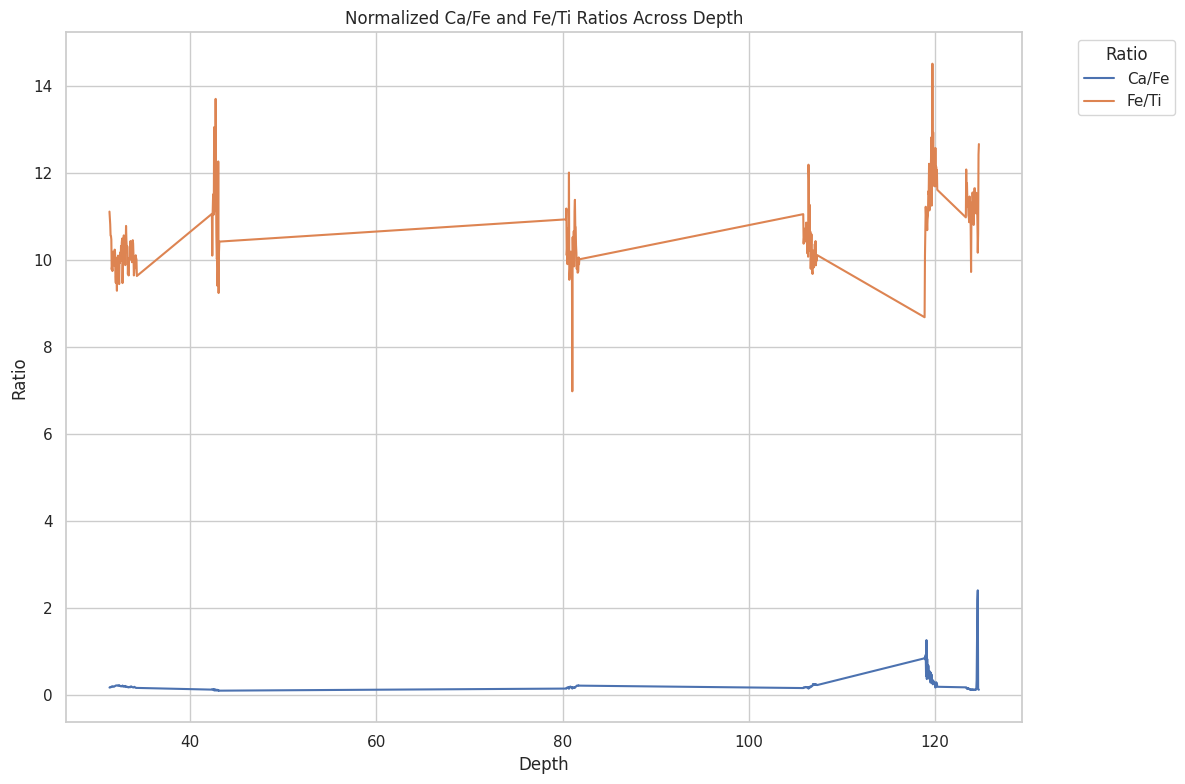

In [15]:
# Plot Ca/Fe and Fe/Ti ratios against depth
plt.figure(figsize=(12, 8))

# Plot Ca/Fe ratio
sns.lineplot(data=xrf_filtered_normalized, x='depth', y='Ca/Fe', label='Ca/Fe')

# Plot Fe/Ti ratio
sns.lineplot(data=xrf_filtered_normalized, x='depth', y='Fe/Ti', label='Fe/Ti')

# Customize the plot
plt.title('Normalized Ca/Fe and Fe/Ti Ratios Across Depth')
plt.xlabel('Depth')
plt.ylabel('Ratio')
plt.legend(title='Ratio', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Show the plot
plt.show()


# Okay lets compare these elements!

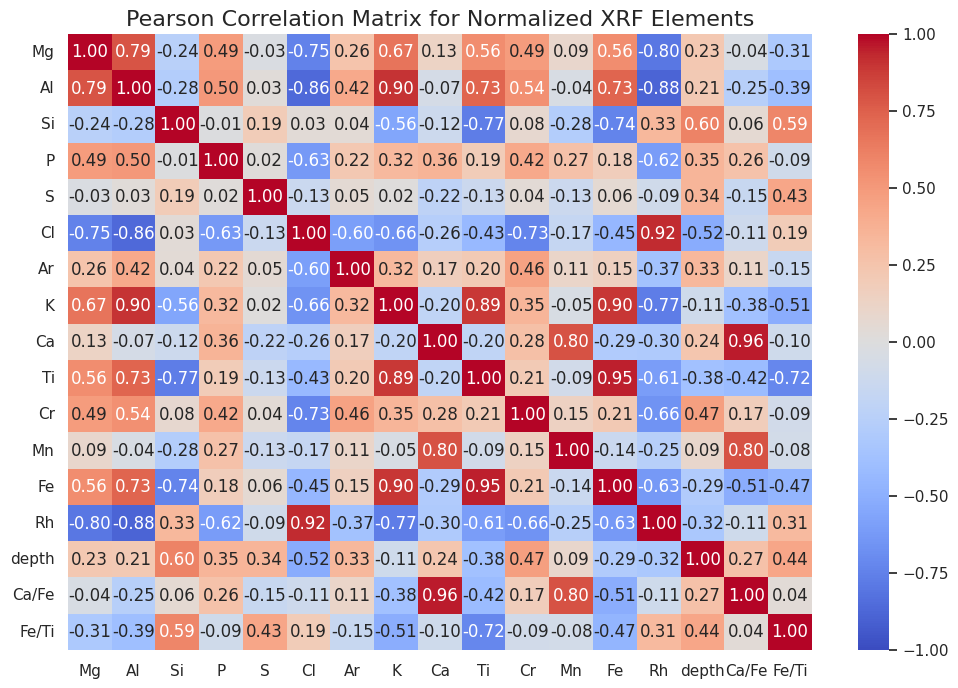

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the Pearson correlation matrix for the normalized XRF data
correlation_matrix = xrf_filtered_normalized.corr(method='pearson')

# Plot the heatmap for the Pearson correlation matrix
plt.figure(figsize=(12, 8))  # Set the figure size
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1, cbar=True)

# Add title to the heatmap
plt.title("Pearson Correlation Matrix for Normalized XRF Elements", fontsize=16)

# Display the plot
plt.show()


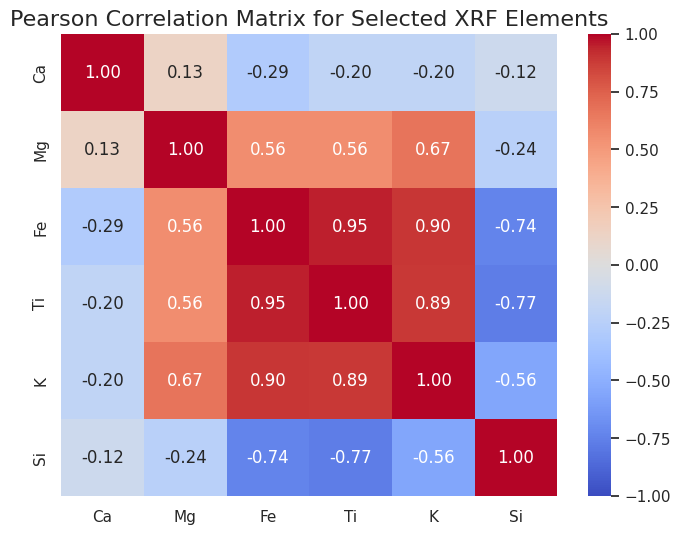

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select the columns of interest
elements_of_interest = ['Ca', 'Mg', 'Fe', 'Ti', 'K', 'Si']
xrf_selected = xrf_filtered_normalized[elements_of_interest]

# Calculate the Pearson correlation matrix for the selected elements
correlation_matrix = xrf_selected.corr(method='pearson')

# Plot the heatmap for the Pearson correlation matrix
plt.figure(figsize=(8, 6))  # Set the figure size
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1, cbar=True)

# Add title to the heatmap
plt.title("Pearson Correlation Matrix for Selected XRF Elements", fontsize=16)

# Display the plot
plt.show()


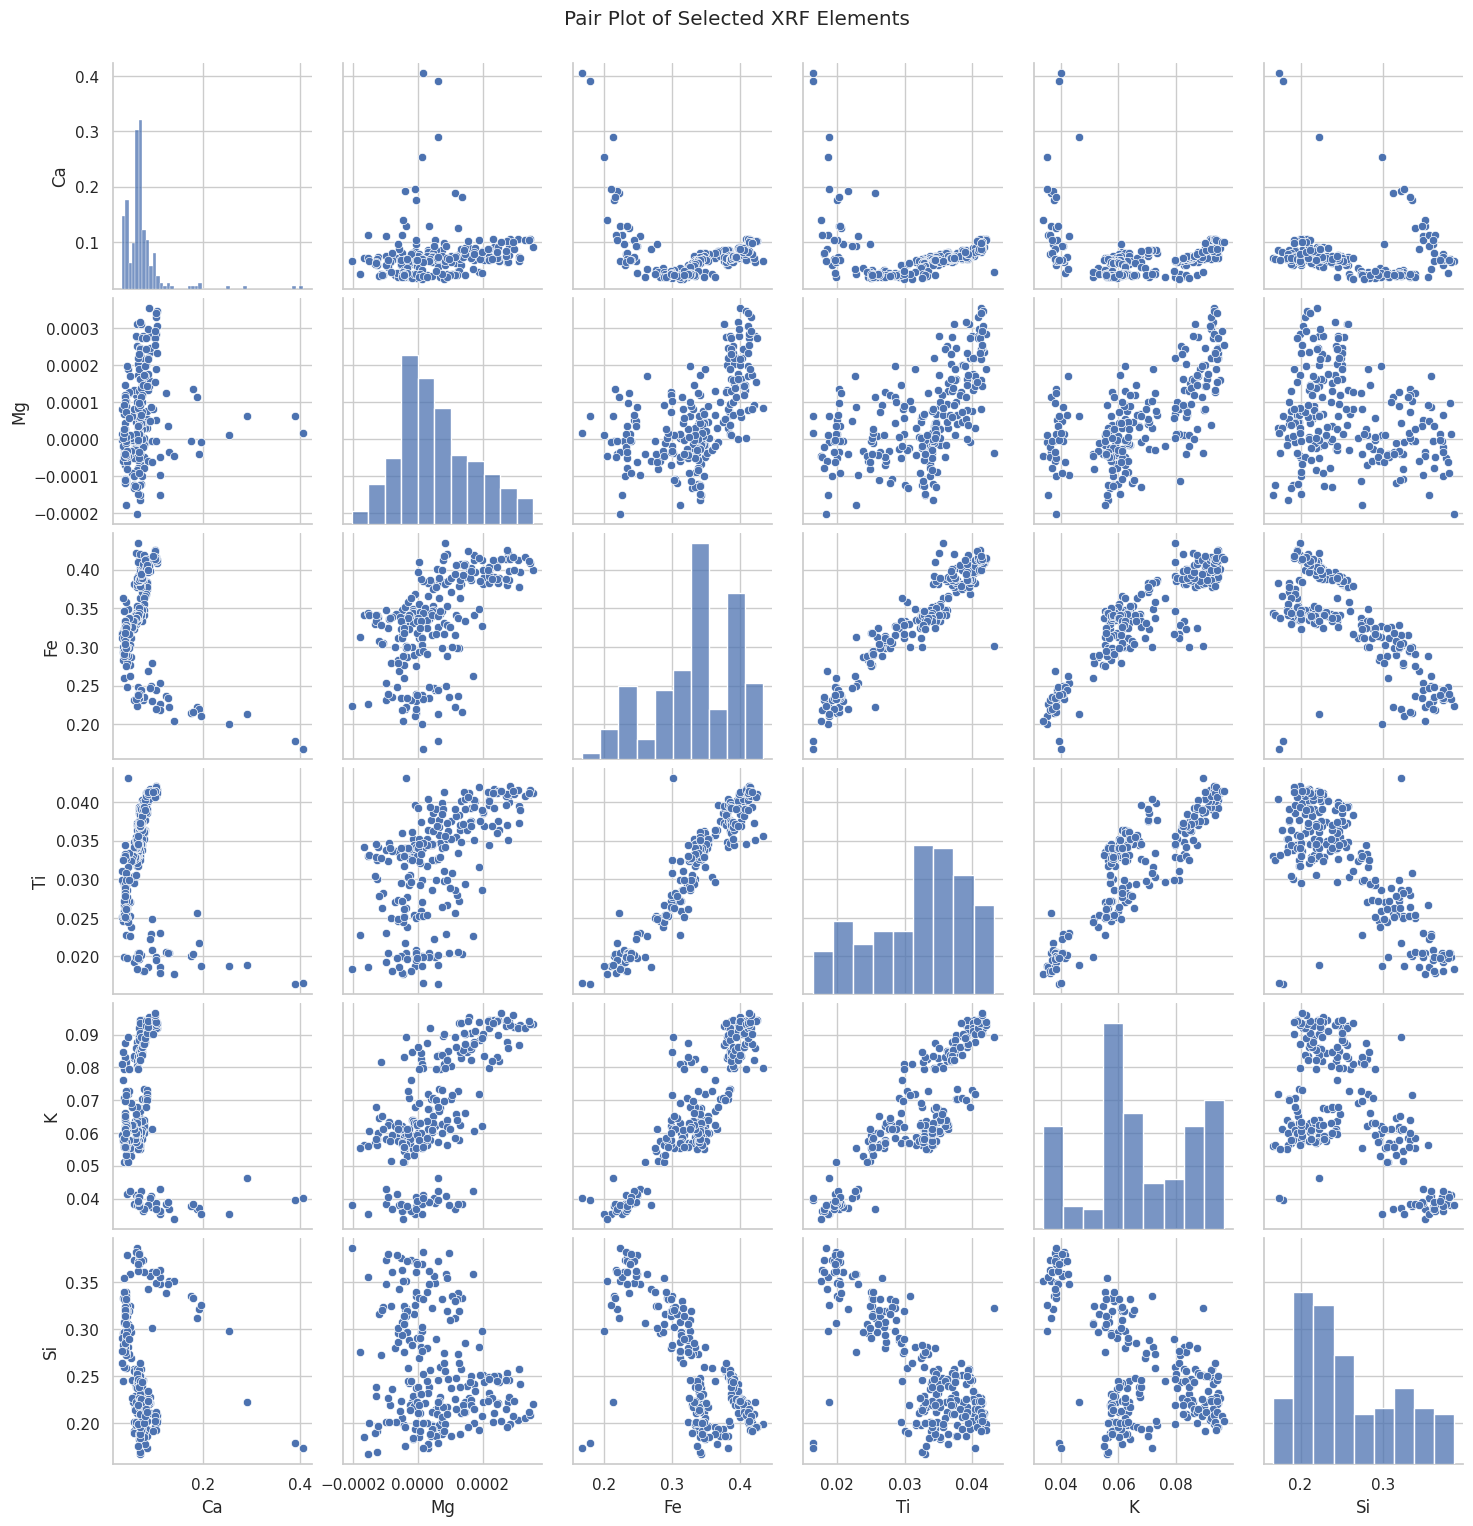

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select the columns for the pair plot from the normalized XRF data
elements_data = xrf_filtered_normalized[['Ca', 'Mg', 'Fe', 'Ti', 'K', 'Si']]

# Create the pair plot
sns.pairplot(elements_data)

# Add title
plt.suptitle("Pair Plot of Selected XRF Elements", y=1.02)

# Show the plot
plt.show()


Woah! It looks like there are definitely some relationships between some elements.  Lets explore a bit more

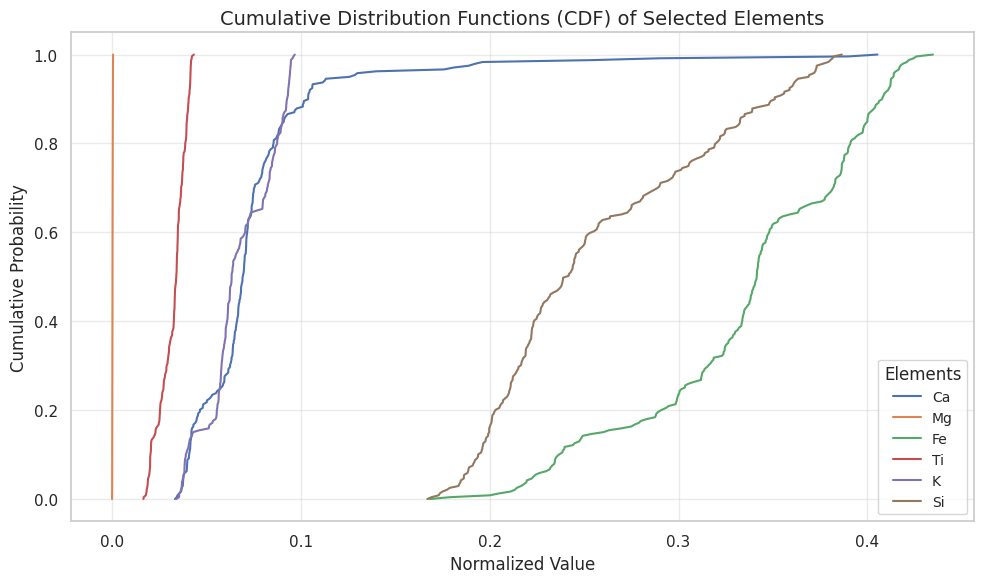

In [19]:
import numpy as np
import matplotlib.pyplot as plt

# Define the selected elements
selected_elements = ['Ca', 'Mg', 'Fe', 'Ti', 'K', 'Si']

# Create a figure for the CDFs
plt.figure(figsize=(10, 6))

# Generate the CDF for each element
for element in selected_elements:
    # Sort the data for the element
    sorted_data = np.sort(xrf_filtered_normalized[element])

    # Generate cumulative probabilities
    cumulative_probabilities = np.linspace(0, 1, len(sorted_data), endpoint=True)

    # Plot the CDF
    plt.plot(sorted_data, cumulative_probabilities, label=element)

# Customize the plot
plt.title("Cumulative Distribution Functions (CDF) of Selected Elements", fontsize=14)
plt.xlabel("Normalized Value", fontsize=12)
plt.ylabel("Cumulative Probability", fontsize=12)
plt.legend(title="Elements", fontsize=10)
plt.grid(alpha=0.4)
plt.tight_layout()

# Show the plot
plt.show()


Just to explore, I decided to make a histogram of each element in the dataset.  Unfortunately, this is not actually very descriptive, as elemental concentration changes over time.  However, if I could take more cores and throw them into this analysis, I could compare elemental composition in drill sites regionally.

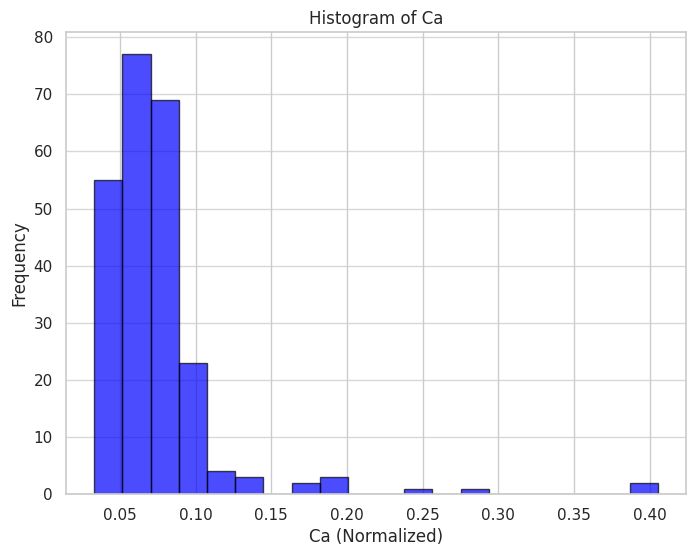

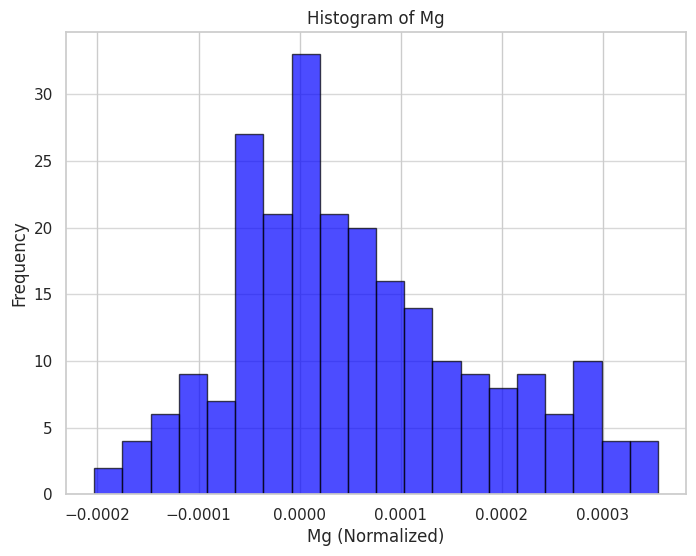

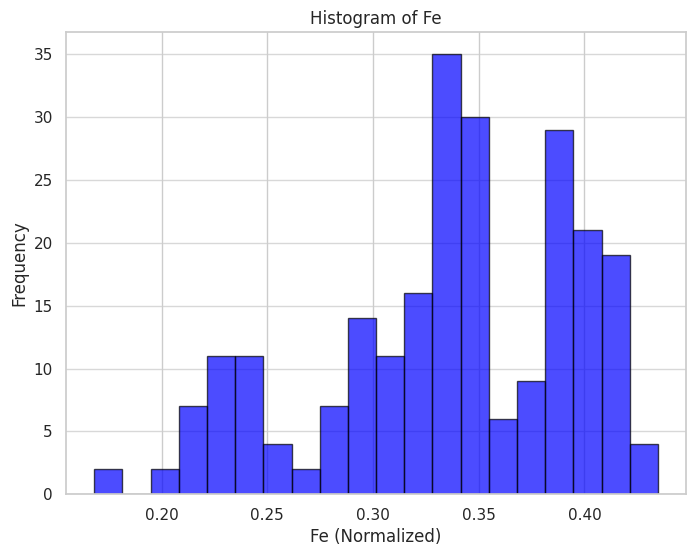

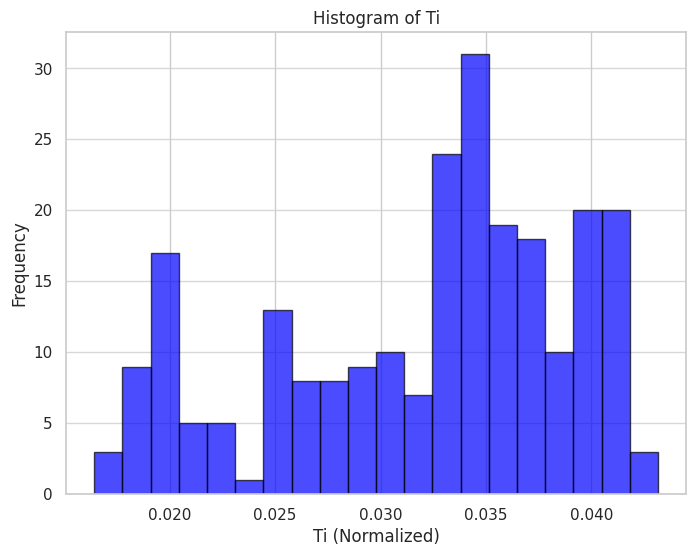

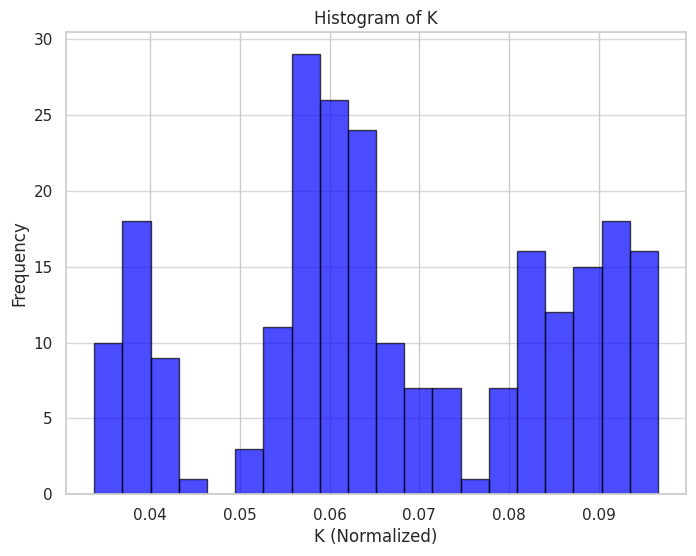

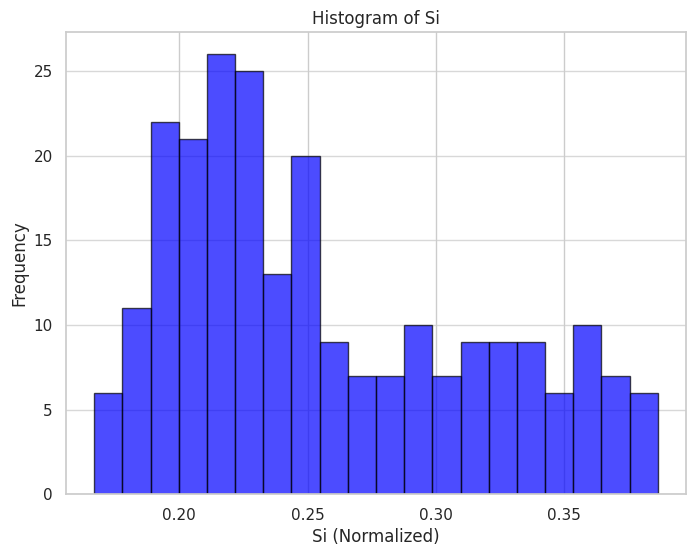

In [20]:
import matplotlib.pyplot as plt

# List of selected elements for histograms
selected_elements = ['Ca', 'Mg', 'Fe', 'Ti', 'K', 'Si']

# Create histograms
for element in selected_elements:
    plt.figure(figsize=(8, 6))
    plt.hist(xrf_filtered_normalized[element], bins=20, alpha=0.7, color='blue', edgecolor='black')
    plt.title(f"Histogram of {element}")
    plt.xlabel(f"{element} (Normalized)")
    plt.ylabel("Frequency")
    plt.grid(axis='y', alpha=0.75)
    plt.show()


My next steps will include getting this data for the other 5 holes drilled on this expedition, and comparing all of them together.  I also will get data from a set of cores recovered from the Amundsen Sea with the ultimate goal of tracking ocean change from the Miocene to today using these two areas to examine regional differences across these time periods.